# Quantum Teleportation --- GHZ States

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [2]:
## Defining a function in order to plot our desired circuit

In [3]:
# plot function
def plot(x):
    return x.draw('mpl', scale=0.7, initial_state=True, style = 'iqx')

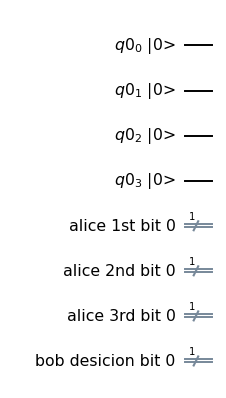

In [4]:
# Define the classical bits for Alice and Bob
c_A1 = ClassicalRegister(1, name = 'alice 1st bit')
c_A2 = ClassicalRegister(1, name = 'alice 2nd bit')
c_A3 = ClassicalRegister(1, name = 'alice 3rd bit')
c_B = ClassicalRegister(1, name = 'bob desicion bit')

# Build the quantum circuit
qc = QuantumCircuit(QuantumRegister(4),c_A1,c_A2,c_A3,c_B)
# I couldn't give a name to qubits, first two qubits beling to Alice and 3rd qubit belongs to Bob
plot(qc)

## Building a quantum state which is unknown to Alice (sender)

In [5]:
from math import pi,sqrt

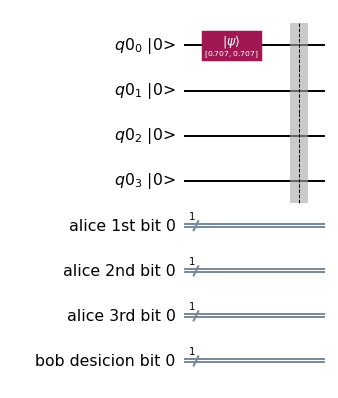

In [6]:
# Initialize an unknown quantum state
ampl = [1/sqrt(2),1/sqrt(2)]
qc.initialize(ampl,0)
qc.barrier()
plot(qc)

## Visualization of the state $|\psi\rangle$

In [7]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

In [8]:
sv0 = Statevector(qc)
sv0.draw('latex')

<IPython.core.display.Latex object>

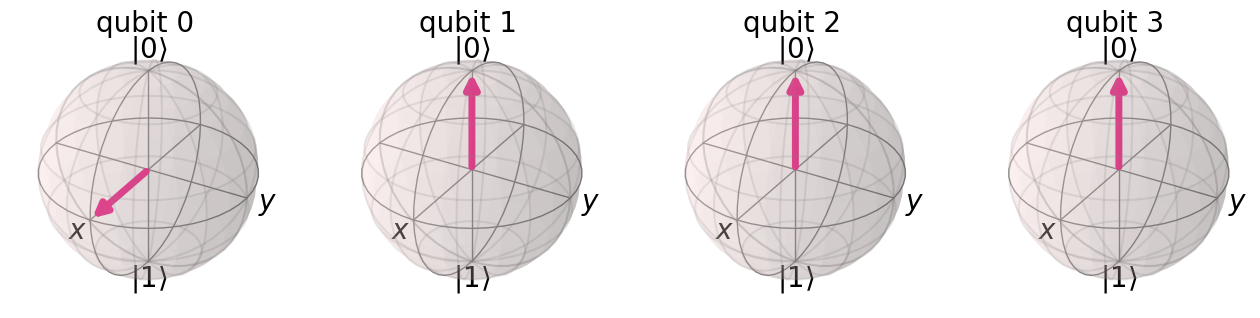

In [9]:
plot_bloch_multivector(sv0)

## Creating entanglement between Alice and Bob
This is a preprocessing step, it might happen 10 years before starting the Teleportation process or provided through another company for Alice and Bob.

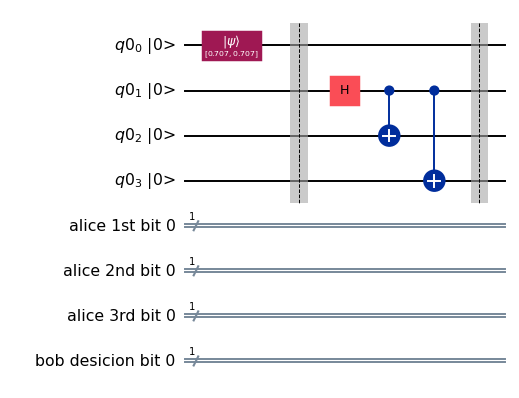

In [10]:
# make entanglement between Alice and Bob
qc.h(1)
qc.cx(1,2)
qc.cx(1,3)
qc.barrier()
plot(qc)

In [11]:
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

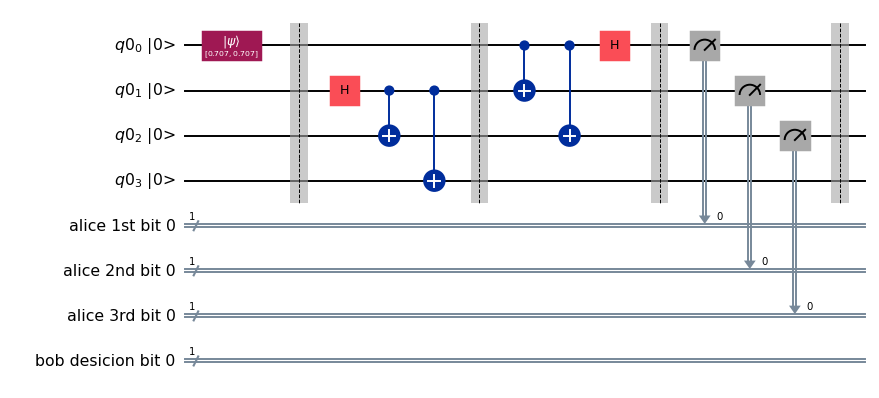

In [18]:
# Alice manupulation before measurement
qc.cx(0,1)
qc.cx(0,2)
qc.h(0)
qc.barrier()
for i in range(3):
    qc.measure(i,i)
    
qc.barrier()
plot(qc)

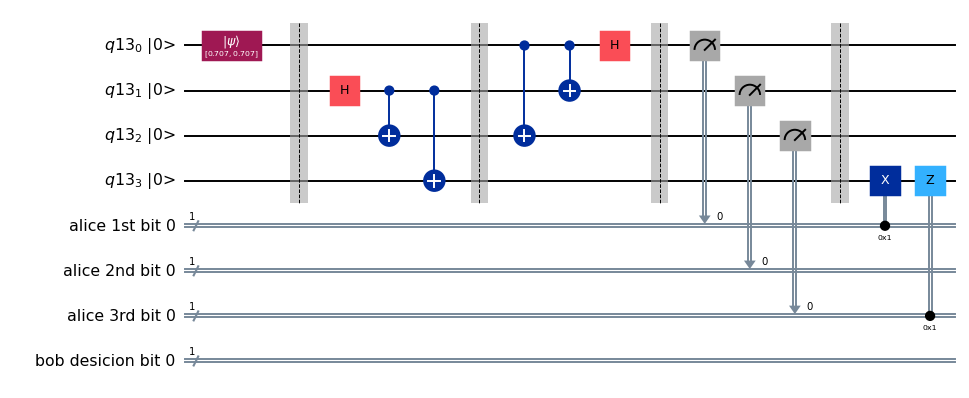

In [39]:
qc.x(3).c_if(c_A1,1)
qc.z(3).c_if(c_A3,1)
plot(qc)

In [40]:
# simulating the circu Teleportation circuit
from qiskit import Aer, execute

In [41]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
sv_final = result.get_statevector()
sv_final

Statevector([ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
              0.70710678-8.65956056e-17j, -0.        +0.00000000e+00j,
             -0.        +0.00000000e+00j,  0.        -0.00000000e+00j,
             -0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
             -0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
             -0.70710678+0.00000000e+00j, -0.        +0.00000000e+00j],
            dims=(2, 2, 2, 2))


In [42]:
# We should reverse the states

In [43]:
from qiskit.visualization import array_to_latex

In [44]:
display(array_to_latex(sv_final, prefix="|\\psi\\rangle ="))

<IPython.core.display.Latex object>

## Comparison of the initial state (Alice Side) and final State (Bob Side)

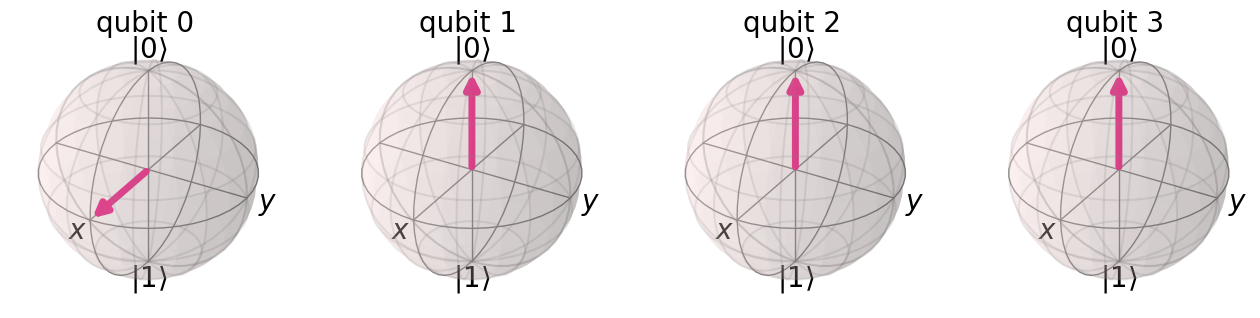

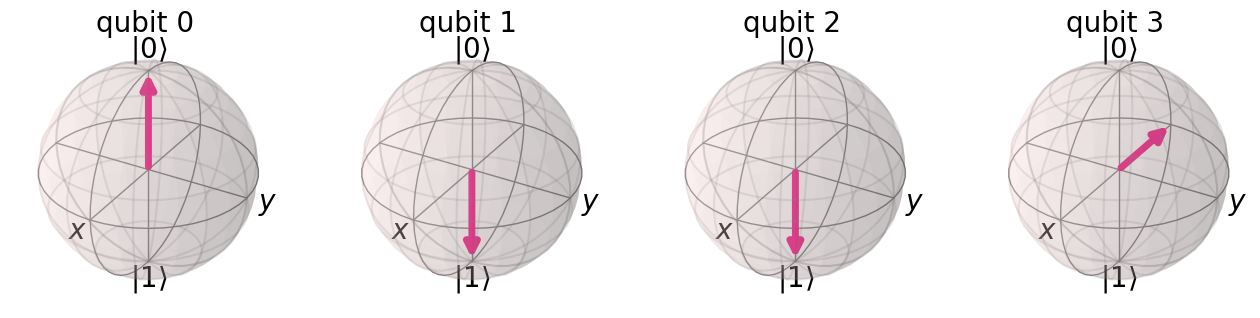

In [45]:
display(plot_bloch_multivector(sv0),plot_bloch_multivector(sv_final))

You can see the quantum state $|\psi\rangle$ from the first qubit transferred to the third qubit which belongs to Bob.

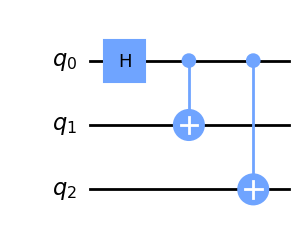

<IPython.core.display.Latex object>

In [17]:
qc1 = QuantumCircuit(3)
qc1.h(0)
qc1.cx(0,1)
qc1.cx(0,2)
display(qc1.draw('mpl'),Statevector(qc1).draw('latex'))